### Exercise 01.3
- **Simulate** the Buffon’s experiment (see LSN_Lecture_00, supplementary material):  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
<font color="red">Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties). If possible, do not use $\pi$ to evaluate $\pi$.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import math


M=500000
d = 3 #spaziatura righe
L = 1.4 #lunghezza ago

np.random.seed(3) 
o = np.random.rand(M)*d

#da -L a L
x = np.random.rand(M)
x = (x*2-1)*L
y = np.random.rand(M)
y = (y*2-1)*L

#quadrato di raggio L, butto via quelli fuori dal cerchio
a = y[(x**2+y**2)<L]

x= x[(x**2+y**2)<L]

y=a

#plt.scatter(x,y,s=.1)


array([ 4., 25., 25., ..., 23., 27., 34.])

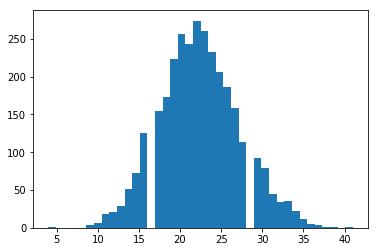

In [35]:
# controllo l'uniformità di questi angoli
theta = np.arctan2(x,y)

v=np.empty([])

for angle in np.arange (0, 3.14159/2,.0005):
    
    num = (theta[(theta >angle) & (theta <angle+0.0005)] ).size
    v=np.append(v, num)
    
    
n, bins, patches = plt.hist(v,40)
v

In [30]:
#verifica se c'è l'intersezione

x=np.divide(x,np.sqrt(x**2+y**2))*L


xPunta = o[0:x.size]+x;

vettoreIntersezioni =  xPunta[(xPunta>d) | (xPunta<0.)]

colpiti = vettoreIntersezioni.size

P = colpiti/x.size
pigreco = (2/P)*(L/d)
pigreco

3.1401116657067893

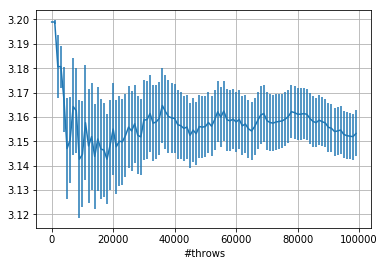

In [97]:
#plot c++ data

M=100000              # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block (=experiment)

d = 1.2
l=1.

x = np.arange(N)      # [0,1,2,...,N-1]

x*=L                  # Number of throws = block * (Number of throws in each block)

sum_prog = np.loadtxt(fname = "rMedia.txt")
err_prog = np.loadtxt(fname = "rErrore.txt")

pigreco= (2./sum_prog)*(l/d)
errPi = err_prog *pigreco/sum_prog


plt.errorbar(x,pigreco,yerr=errPi)
plt.xlabel('#throws')
#plt.ylim(top=3.17,bottom=3.125)
#plt.xlim(right=1e7,left=0.99e7)
plt.grid(True)
plt.show()

In [92]:
pigreco

array([2.97619048, 2.97619048, 3.03030303, ..., 3.13941186, 3.13944734,
       3.13943552])

In [93]:
errPi

array([0.        , 0.00017213, 0.0389616 , ..., 0.00293325, 0.00293326,
       0.00293297])